In [52]:

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif_
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression as logreg
from sklearn import datasets

In [2]:
b = datasets.load_breast_cancer()
dir(b)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
print(b['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
df = pd.DataFrame(data=b['data'], columns=b['feature_names'])
df['target'] = b['target']
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
first_ten = df.iloc[:,:11]
first_ten['target'] = df['target'].copy()
first_ten

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0
...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,0


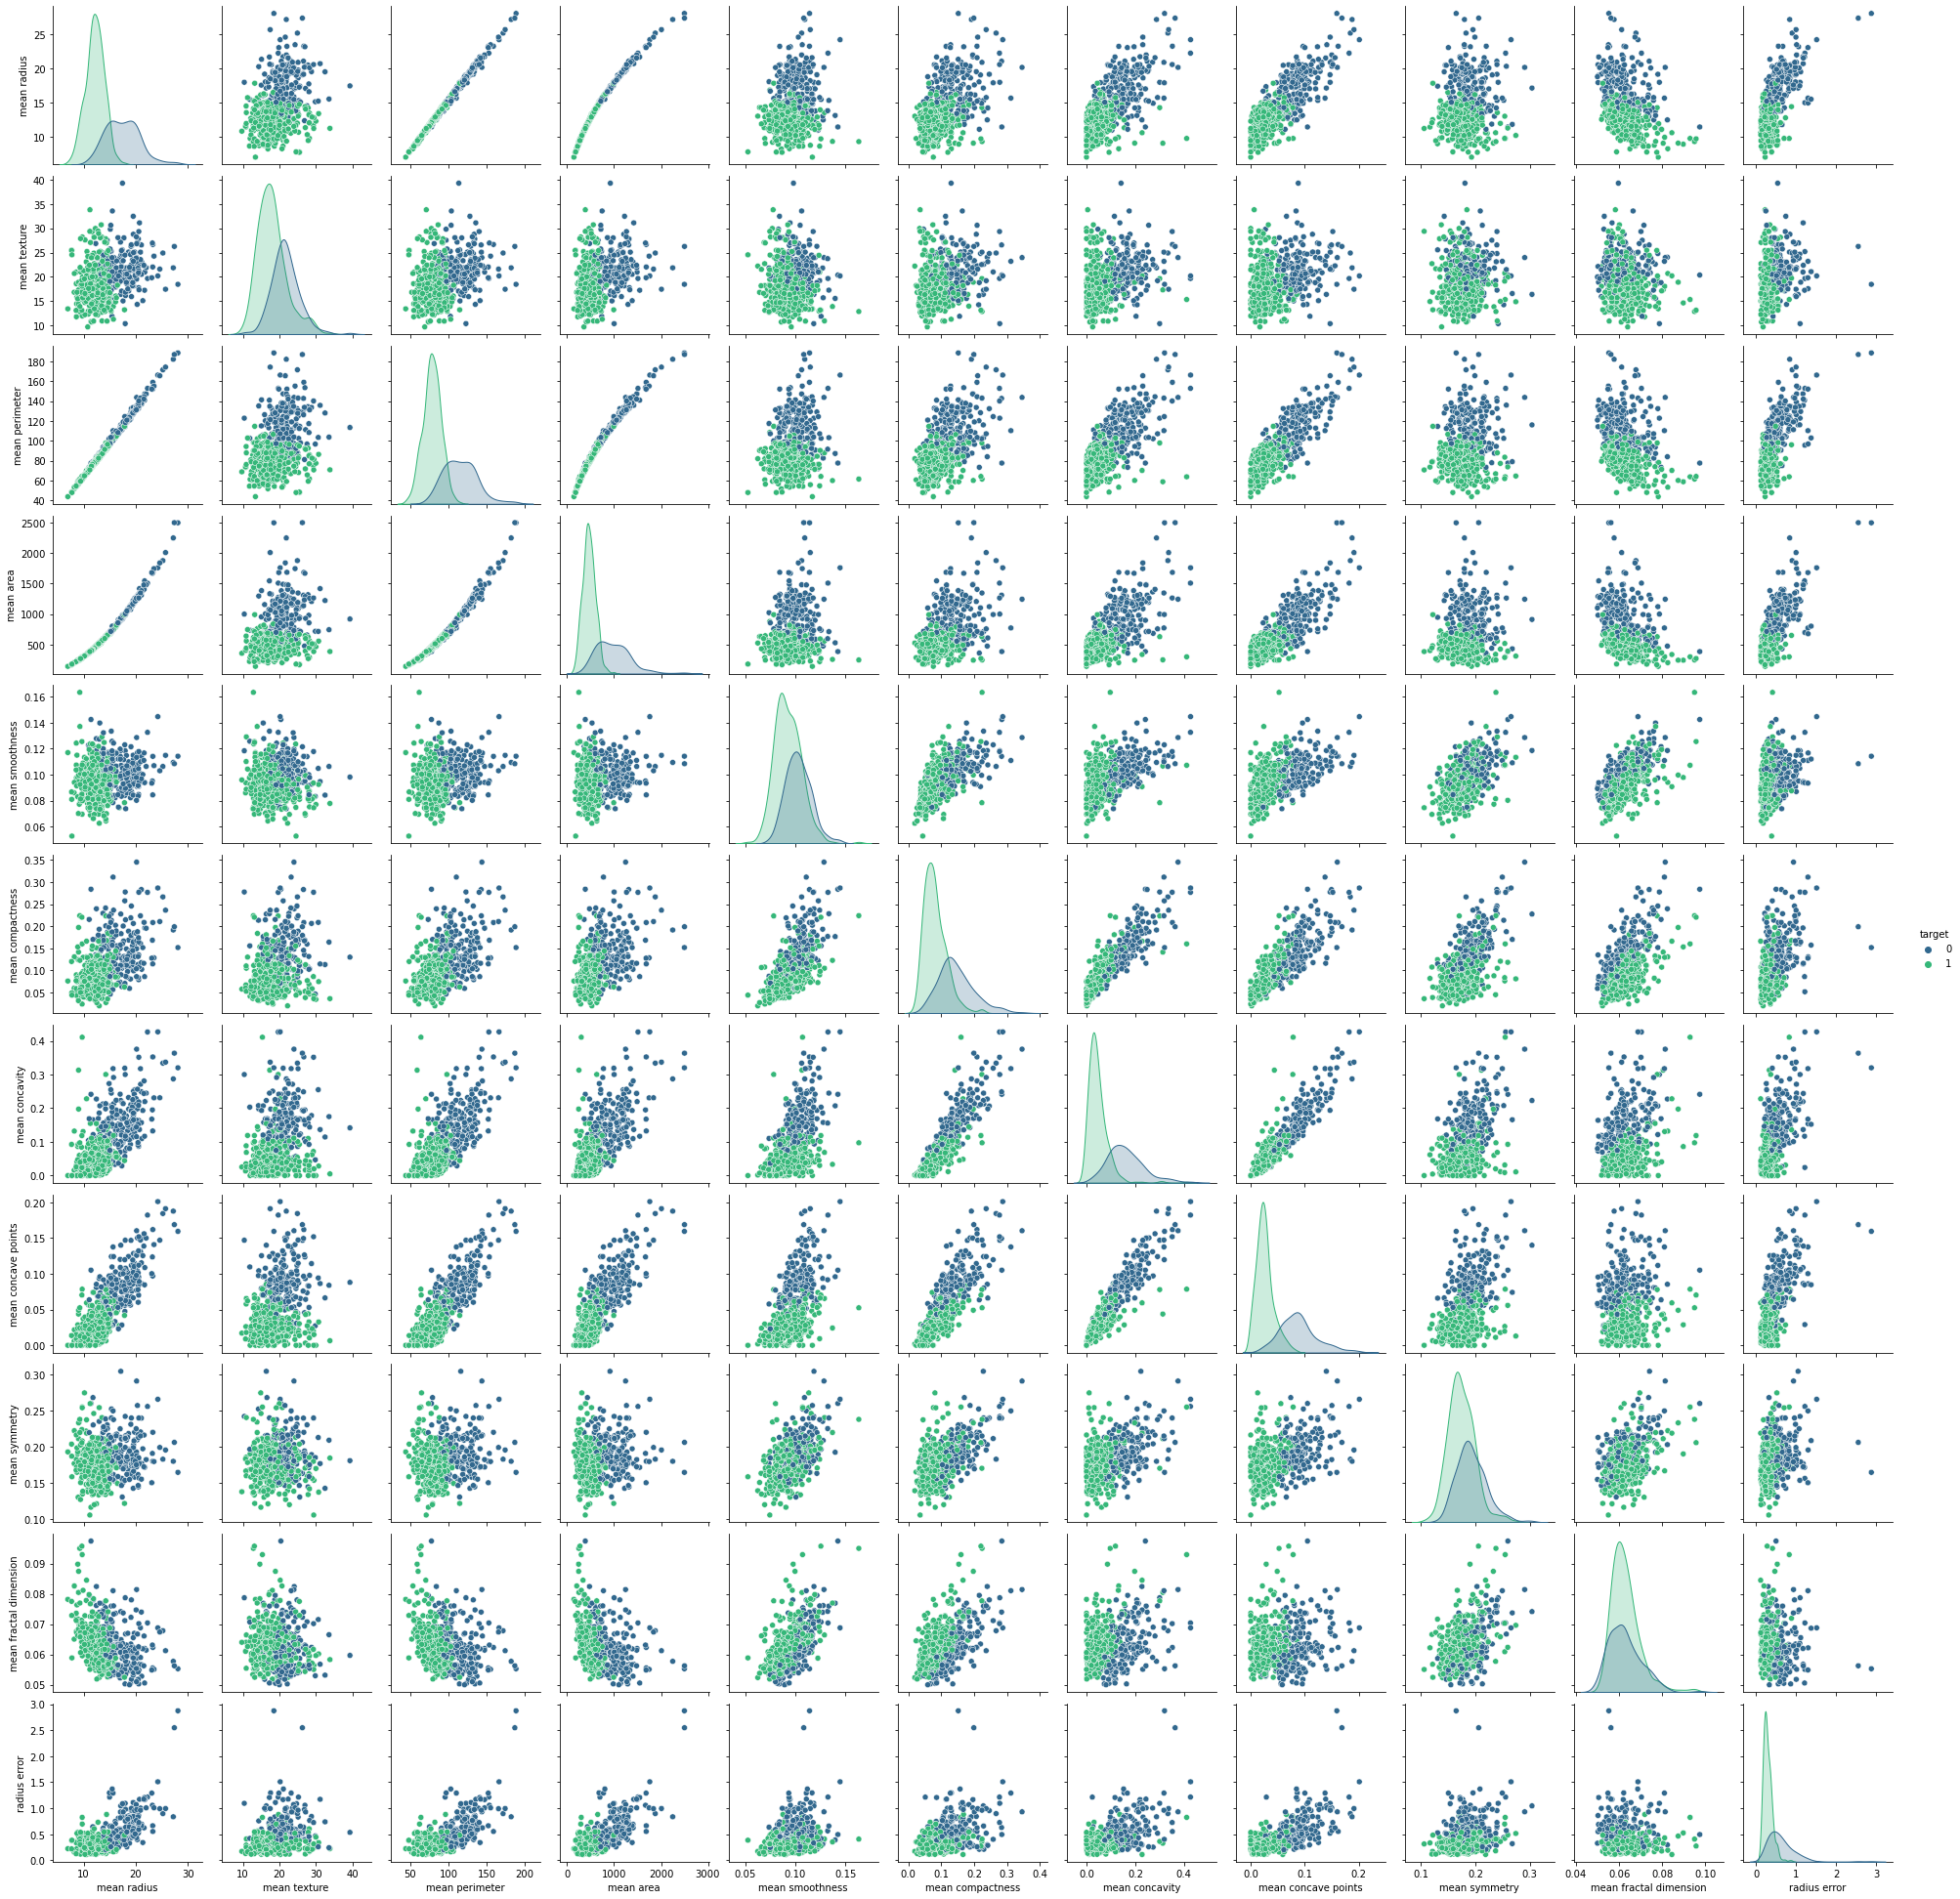

In [6]:
sns.pairplot(data=first_ten, hue='target', palette='viridis')

In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [10]:
df['target'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

<br>
using ['mean perimeter', 'mean concave points']

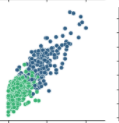

In [11]:
feat = ['mean perimeter', 'mean concave points']
targ = ['target']

xi = first_ten[feat]
yi = first_ten[targ]

xi_train, xi_test, yi_train, yi_test = train_test_split(xi, yi, stratify=yi,test_size=0.2 , random_state=2021)

logit = logreg()

In [21]:
yi_train.value_counts(normalize=True).to_frame()

,0
target,
1,0.626374
0,0.373626


In [22]:
yi_test.value_counts(normalize=True).to_frame()

,0
target,
1,0.631579
0,0.368421


In [12]:
logit.fit(xi_train, yi_train)
yi_pred = logit.predict(xi_test)
accuracy_score(yi_test, yi_pred)

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8947368421052632

In [51]:
roc_auc_score(yi_test, yi_pred)

0.8819444444444444

In [16]:
y_proba = logit.predict_proba(xi_test)
y_proba[:5]

array([[0.84159188, 0.15840812],
       [0.99565714, 0.00434286],
       [0.61337006, 0.38662994],
       [0.03472038, 0.96527962],
       [0.0397407 , 0.9602593 ]])

In [18]:
pred_proba = pd.DataFrame({'pred' : yi_pred, 'proba0': y_proba[:,0], 'proba1': y_proba[:,1]})
pred_proba

,pred,proba0,proba1
0,0,0.841592,0.158408
1,0,0.995657,0.004343
2,0,0.613370,0.386630
3,1,0.034720,0.965280
4,1,0.039741,0.960259
...,...,...,...
109,1,0.015464,0.984536
110,1,0.059523,0.940477
111,0,0.995318,0.004682
112,0,0.952826,0.047174


In [23]:
logit.coef_

array([[-0.15540252, -1.10159146]])

In [24]:
logit.intercept_

array([14.94905008])

In [27]:
b0 = logit.intercept_
b1 = logit.coef_[0][0]
b2 = logit.coef_[0][1]

In [28]:
print(" b0 :",b0)
print(" b1 :",b1)
print(" b2 :",b2)

 b0 : [14.94905008]
 b1 : -0.15540251969242036
 b2 : -1.1015914597402294


In [29]:
sm_logit = sm.Logit(yi, sm.add_constant(xi))
result = sm_logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.184219
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Jan 2021   Pseudo R-squ.:                  0.7210
Time:                        15:33:22   Log-Likelihood:                -104.82
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.238e-118
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.5507      1.550      8.741      0.000      10.512      16.589
me

In [30]:
xi_test

,mean perimeter,mean concave points
363,106.60,0.04835
517,130.50,0.09431
500,98.73,0.06142
50,74.72,0.01115
293,75.54,0.02280
...,...,...
266,69.28,0.02642
155,78.27,0.02331
343,129.90,0.11030
274,115.20,0.04744


## Sigmoid manual check
$ \displaystyle S = \frac{e^{\alpha}}{1+e^{\alpha}} $

In [33]:
atas = np.exp(b0 + (b1*xi_test['mean perimeter']) + (b2*xi_test['mean concave points']))
atas[:5]

363     0.188224
517     0.004362
500     0.630337
50     27.801530
293    24.163119
dtype: float64

In [34]:
bawah = (1 + np.exp(b0 + (b1*xi_test['mean perimeter']) + (b2*xi_test['mean concave points'])))
bawah[:5]

363     1.188224
517     1.004362
500     1.630337
50     28.801530
293    25.163119
dtype: float64

In [35]:
a = atas/bawah
a.reset_index(drop=True, inplace=True) #ngebenerin index nya

In [36]:
pred_proba['P(Y=1)'] = a
pred_proba['P(Y=0)'] = 1 -a
pred_proba

,pred,proba0,proba1,P(Y=1),P(Y=0)
0,0,0.841592,0.158408,0.158408,0.841592
1,0,0.995657,0.004343,0.004343,0.995657
2,0,0.613370,0.386630,0.386630,0.613370
3,1,0.034720,0.965280,0.965280,0.034720
4,1,0.039741,0.960259,0.960259,0.039741
...,...,...,...,...,...
109,1,0.015464,0.984536,0.984536,0.015464
110,1,0.059523,0.940477,0.940477,0.059523
111,0,0.995318,0.004682,0.004682,0.995318
112,0,0.952826,0.047174,0.047174,0.952826


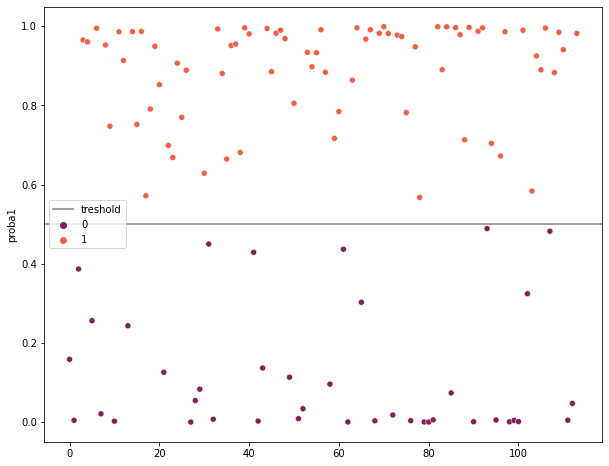

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=np.arange(len(pred_proba)), y=pred_proba['proba1'], hue=pred_proba['pred'], palette='rocket')
plt.axhline(0.5, color = 'gray', label='treshold')
plt.legend()
plt.show()

In [54]:
fpr, tpr, thresholds = roc_curve(yi_test, yi_pred)

array([0.        , 0.16666667, 1.        ])

In [57]:
ns_probs = [0 for _ in range(len(yi_test))]
lr_probs = y_proba[:, 1]

In [58]:
ns_auc = roc_auc_score(yi_test, ns_probs)
lr_auc = roc_auc_score(yi_test, lr_probs)

In [ ]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()